<img src="https://i.imgur.com/lQJojh4.png"/>

## Análise de Eficiência e Satisfação do Atendimento ao Cliente em Supermercados  🛍️

### Neste projeto, a rede de supermercados busca aprimorar a qualidade do atendimento ao cliente em suas lojas, focando em entender as interações entre os clientes e os funcionários, bem como identificar áreas de melhoria para oferecer uma experiência excepcional aos clientes.

### Problema de Negócio:

A rede de supermercados enfrenta o desafio de melhorar a experiência do cliente em suas lojas, incluindo a eficiência no atendimento, a satisfação do cliente e a identificação de gargalos que possam afetar negativamente a experiência.

### Visão de Negócio:

- **Monitoramento do Atendimento ao Cliente**: A implementação de sensores estrategicamente posicionados nas lojas permitirá rastrear a movimentação dos clientes, medindo o tempo de espera nas filas e analisando o fluxo de tráfego.
- **Feedback em Tempo Real**: Terminais de feedback estarão disponíveis em pontos-chave das lojas, permitindo que os clientes avaliem o atendimento que receberam instantaneamente, fornecendo informações valiosas em tempo real.
- **Análise de Interações**: A análise detalhada das interações entre funcionários e clientes será conduzida, incluindo a qualidade das saudações, a assistência fornecida e a eficácia na resolução de dúvidas ou problemas.
- **Avaliação do Tempo de Espera**: Será medido o tempo que os clientes passam nas filas de pagamento, permitindo uma avaliação objetiva se os tempos de espera estão dentro dos padrões aceitáveis.
- **Análise de Satisfação por Setor**: A satisfação dos clientes será avaliada em diferentes setores da loja, como o atendimento no caixa, o setor de frutas e verduras e outros, para identificar pontos fortes e áreas que precisam de melhorias.

### Benefícios Esperados:

- **Melhoria da Experiência do Cliente**: Com a identificação de gargalos e áreas de espera longa, a rede de supermercados será capaz de melhorar a experiência geral do cliente, aumentando a satisfação.
- **Treinamento de Funcionários**: As análises detalhadas das interações permitirão fornecer treinamento específico para os funcionários, aprimorando suas habilidades de atendimento.
- **Redução de Tempo de Espera**: Com base na avaliação dos tempos de espera, será possível otimizar o planejamento de pessoal para reduzir filas e tempos de espera excessivos.
- **Monitoramento da Satisfação ao Longo do Tempo**: Acompanhar as mudanças na satisfação do cliente ao longo do tempo permitirá avaliar a eficácia das melhorias implementadas e identificar tendências.
- **Tomada de Decisões Orientada por Dados**: As decisões relacionadas ao atendimento ao cliente serão fundamentadas em dados concretos, proporcionando uma abordagem mais estratégica e eficaz.

### Impacto:

Este projeto permitirá que a rede de supermercados compreenda melhor as interações entre clientes e funcionários, identificando oportunidades de aprimoramento no atendimento. Aumentando a satisfação do cliente e melhorando a eficiência, a empresa poderá criar uma experiência mais positiva para seus clientes, promovendo a fidelização e o sucesso a longo prazo

### dicionário de dados: 

| Coluna       | Tipo de Dado  | Descrição                                       |
|--------------|---------------|-------------------------------------------------|
| cpf          | String (CPF)  | CPF do cliente que realizou a compra            |
| hora         | String        | Hora da venda no formato HH:MM                 |
| data         | Data          | Data da venda no formato DD/MM/YYYY            |
| produto      | String        | Nome do produto vendido                        |
| preço        | Float         | Preço unitário do produto                      |
| quantidade   | Inteiro       | Quantidade de unidades vendidas do produto     |
| pdv          | Inteiro       | Ponto de venda (número)                        |
| operadora    | String        | Nome da operadora de pagamento                 |
| operação     | String        | Tipo de operação de pagamento (ex: pix)        |
| total        | Float         | Valor total da venda                           |

### importando bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Importação e Visualização Inicial:

In [18]:
# carregando os dados brutos
df = pd.read_csv("../data/raw/venda_07-2023.csv")

In [19]:
# salvando os dados para trabalhar preservando os dados brutos
df.to_csv('../data/interim/venda.csv', index=False)

In [20]:
# Carregando os dados de trabalho
df = pd.read_csv("../data/interim/venda.csv")

### 2. Análise Exploratória:

Tendência de Vendas: A distribuição das vendas ao longo do tempo pode ajudar a identificar padrões sazonais e flutuações nas vendas.

In [21]:
# Converter a coluna 'data' para formato de data
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')

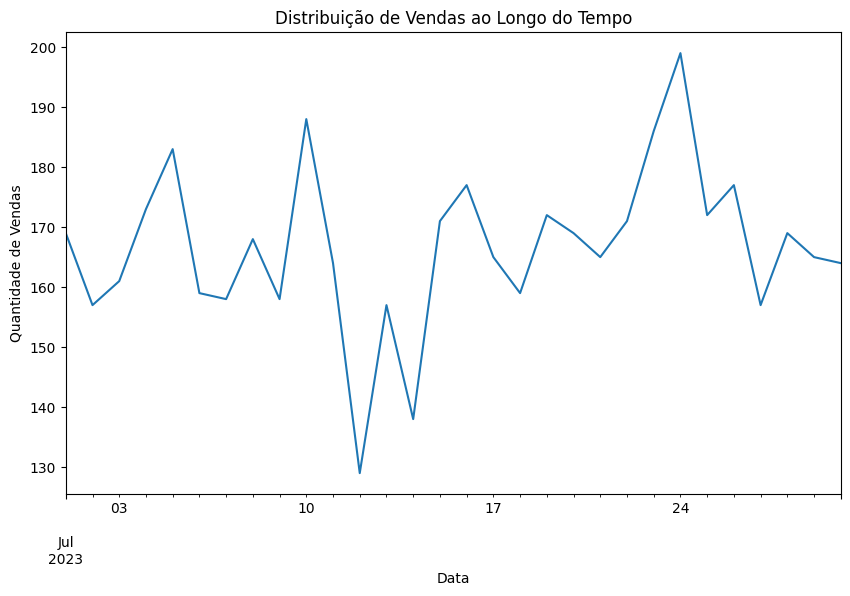

In [23]:
# Verificar a distribuição das vendas ao longo do tempo
plt.figure(figsize=(10, 6))
df.groupby('data').size().plot(kind='line')
plt.title('Distribuição de Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.show()

### 2.2. Produtos Mais Vendidos:

Produtos Mais Populares: A análise dos produtos mais vendidos ajuda a entender quais itens têm maior demanda entre os clientes.

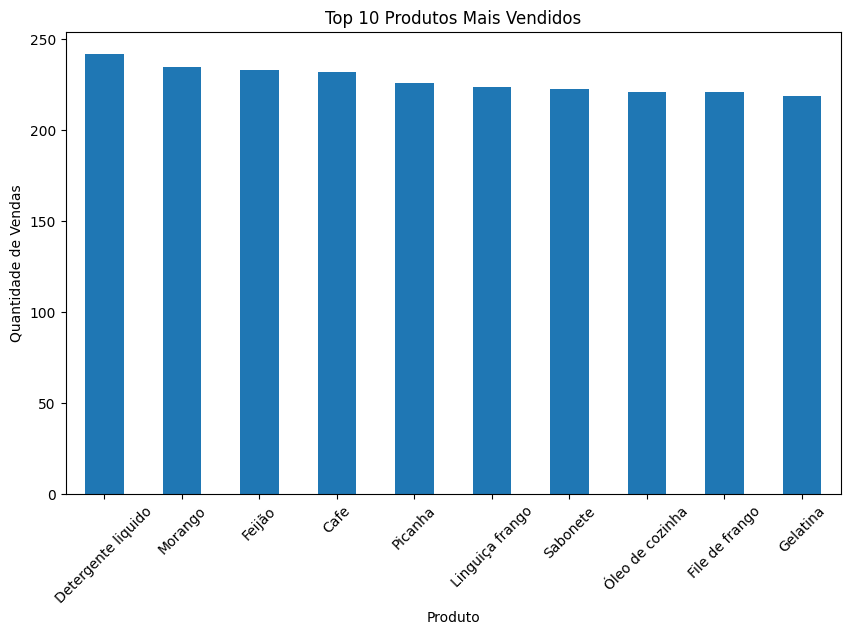

In [24]:
# Produtos mais vendidos
top_products = df['produto'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.show()


### 2.3. Distribuição do Valor Total das Vendas:

Distribuição do Valor das Vendas: A maioria das vendas parece estar concentrada em faixas de valores relativamente baixos.

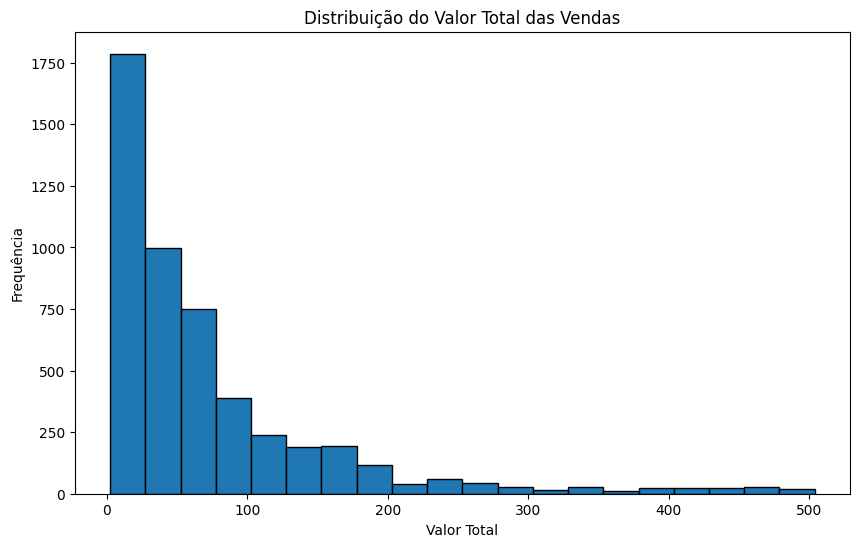

In [26]:
plt.figure(figsize=(10, 6))
df['total'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribuição do Valor Total das Vendas')
plt.xlabel('Valor Total')
plt.ylabel('Frequência')
plt.show()

### 2.4. Análise das Operações de Pagamento:

Preferências de Pagamento: A distribuição das operações de pagamento indica quais métodos são mais populares entre os clientes.

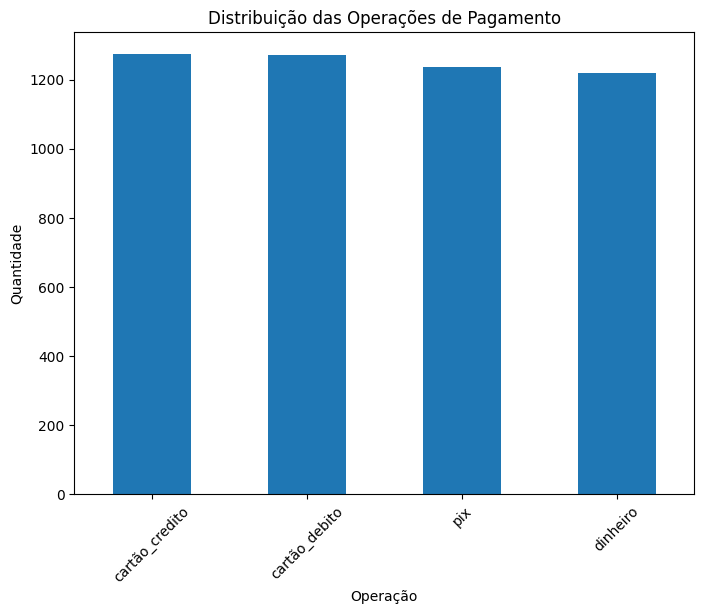

In [27]:
# Distribuição das operações de pagamento
payment_operations = df['operação'].value_counts()
plt.figure(figsize=(8, 6))
payment_operations.plot(kind='bar')
plt.title('Distribuição das Operações de Pagamento')
plt.xlabel('Operação')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

### 2.5. Análise da Satisfação por Operadora:

Satisfação por Operadora: É possível observar as operadoras que têm uma satisfação média mais alta entre os clientes, o que pode indicar um melhor desempenho no atendimento.

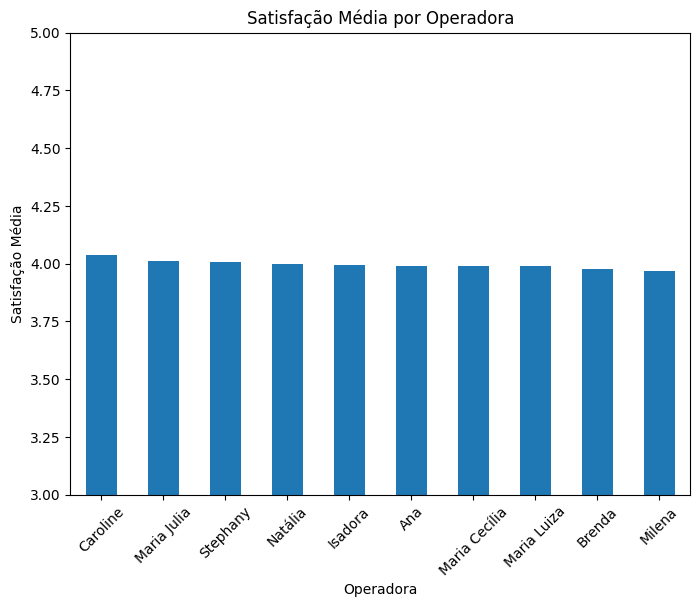

In [29]:
# Gerar dados fictícios de satisfação para cada operadora
import random
df['satisfação'] = [random.uniform(3, 5) for _ in range(len(df))]

# Analisar a satisfação média por operadora
avg_satisfaction = df.groupby('operadora')['satisfação'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
avg_satisfaction.plot(kind='bar')
plt.title('Satisfação Média por Operadora')
plt.xlabel('Operadora')
plt.ylabel('Satisfação Média')
plt.xticks(rotation=45)
plt.ylim(3, 5)
plt.show()